## Simple demonstration of calculating segmentation metrics

In [1]:
import os
import sys
sys.path.append('..')
import segmetrics

import numpy as np
from skimage.io import imread

In [2]:
n = 9
p = '/home/arl/Dropbox/Data/TestingData/UNet2D_testing_Scribble/set12'
true = imread(os.path.join(p, 'labels_compressed', f'l_{n}.tif'))
pred = imread(os.path.join(p, 'segmented_2019-11-27', f's_{n}.tif'))

In [3]:
metrix = segmetrics.calculate(true, pred)

In [4]:
print(metrix)


UNet Segmentation Metrics: 
True objects: 		  583
Predicted objects: 	  569
True positives: 	  552
False positives: 	   12
False negatives: 	   22
Jaccard metric: 	    0.94
Mean IoU metric: 	    0.87
Pixel identity: 	    0.97



### visualize the metrics

In [5]:
# uncomment for interactive
#%matplotlib qt

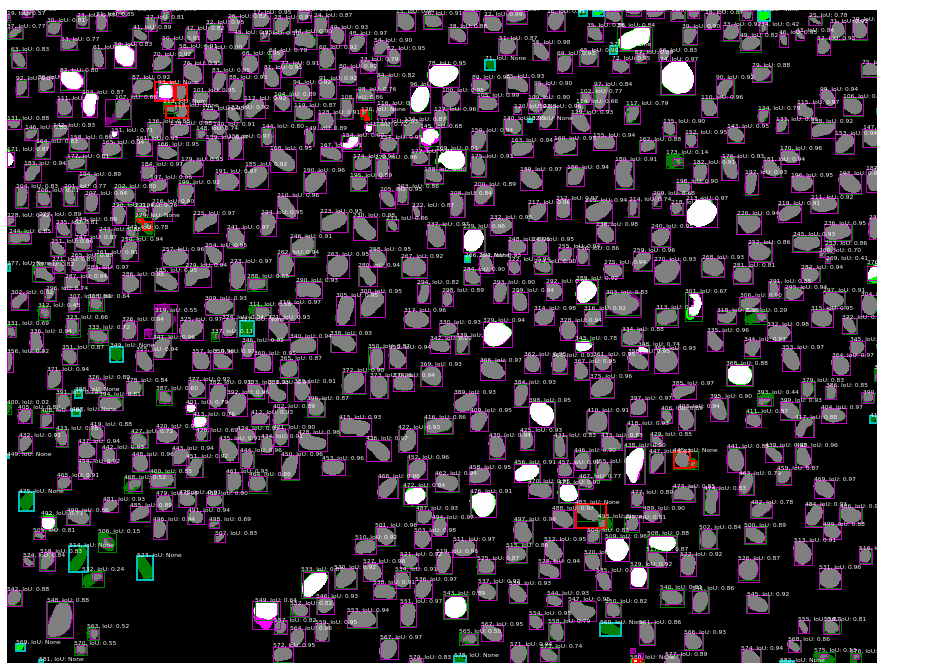

In [6]:
metrix.plot()

In [7]:
print(metrix.metrics)

[583, 569, 552, 12, 22, 0.8733471733954224, 0.9419795221843004, 0.9715276041666666]


### plot some stats

In [8]:
import matplotlib.pyplot as plt

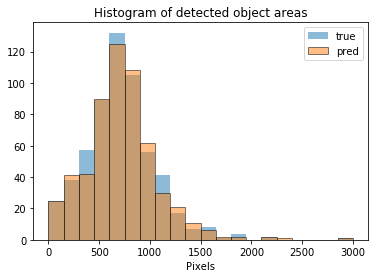

In [10]:
bins = np.linspace(0,3000,21)

plt.figure()
plt.hist(metrix._reference.areas, bins, alpha=0.5, label='true')
plt.hist(metrix._predicted.areas, bins, alpha=0.5, label='pred', edgecolor='k')
plt.legend()
plt.title('Histogram of detected object areas')
plt.xlabel('Pixels')
plt.show()

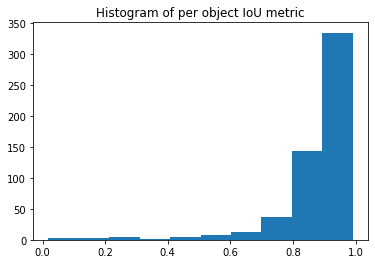

In [11]:
plt.figure()
plt.hist(metrix.per_object_IoU)
plt.title('Histogram of per object IoU metric')
plt.show()

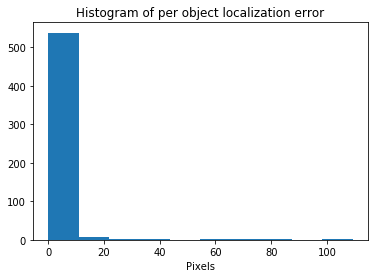

In [12]:
plt.figure()
plt.hist(metrix.localization_error)
plt.title('Histogram of per object localization error')
plt.xlabel('Pixels')
plt.show()